## Indian Food Exploration

In this short analysis,I have tried to explore on Indian cusines , tastes , ingredients , flavors of various dishes provided in this dataset.

## Reading the dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
%matplotlib inline

In [2]:
#data=pd.read_csv("../input/indian-food-101/indian_food.csv")
data=pd.read_csv("../data/indian_food.csv")

In [3]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## Data Cleaning and handling missing values

In [4]:
## Check for nulls,
##since in the data description it is mentioned that missing values are indicated with -1,
for c in data.columns:
    print(f'''Total Missing values in column {c} is {len(data[data[c]=='-1'])}''')

Total Missing values in column name is 0
Total Missing values in column ingredients is 0
Total Missing values in column diet is 0
Total Missing values in column prep_time is 0
Total Missing values in column cook_time is 0
Total Missing values in column flavor_profile is 29
Total Missing values in column course is 0
Total Missing values in column state is 24
Total Missing values in column region is 13


flavor_profile,state and region have -1 in them.Are there any other missing values?

In [9]:
data.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

Region has one blank.Lets check it and see if we can input it by ourselves.

In [16]:
data[data['region'].isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


The state is mentioned as Uttar Pradesh and hence we can provide region as North.

In [5]:
data.loc[data['region'].isna(),'region']='North'

Lets see if we could inpute missing values for the other rows as well (rows with -1).

In [17]:
data.loc[data['region']=='-1',]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
117,Samosa,"Potatoes, green peas, garam masala, ginger, dough",vegetarian,30,30,spicy,snack,-1,-1


For the purpose of simplicity ,let us inpute  'All region' for these recipies.

In [6]:
data.loc[data['region']=='-1','region']='All region'

Similarly for all state,

In [19]:
##state column,
data.loc[data['state']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,All region
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,All region
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,All region
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,All region
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,All region
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,All region
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,All region
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,All region
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,All region
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


In [7]:
data.loc[data['state']=='-1','state']='All States'

Lets check for flavor profile,

In [21]:
data.loc[data['flavor_profile']=='-1',]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10,10,-1,main course,Maharashtra,West
104,Naan,"Whole wheat flour, honey, butter, garlic",vegetarian,60,30,-1,main course,Punjab,North
116,Rongi,"Garam masala powder, tomato, kasuri methi, cin...",vegetarian,10,30,-1,main course,Punjab,North
131,Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45,-1,snack,Kerala,South
145,Pachadi,"Coconut oil, cucumber, curd, curry leaves, mus...",vegetarian,10,25,-1,main course,All States,South
146,Paniyaram,"Yogurt, ginger, curry leaves, baking soda, gre...",vegetarian,10,20,-1,main course,Tamil Nadu,South
150,Paruppu sadam,"Arhar dal, sambar powder, tomato, curry leaves...",vegetarian,10,20,-1,main course,Tamil Nadu,South
153,Puli sadam,"Urad dal, lemon, tamarind, cooked rice, curry ...",vegetarian,10,20,-1,main course,Tamil Nadu,South
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,-1,main course,Kerala,South
157,Sandige,"Thin rice flakes, black sesame seeds, curry le...",vegetarian,120,60,-1,main course,Karnataka,South


Based on the ingredients used for the dish and based on my taste of that dish,I have tried to map the flavor_profile for the missing dishes.Pls let me know in the comments if incase I have mapped the flavors wrongly.

In [8]:
flavor_dict={'Chapati':'sweet',
'Naan':'sweet',
'Rongi':'sweet',
'Kanji':'sweet',
'Pachadi':'sweet',
'Paniyaram':'sweet',
'Paruppu sadam':'sour',
'Puli sadam':'sour',
'Puttu':'sweet',
'Sandige':'sweet',
'Sevai':'sweet',
'Thayir sadam':'sour',
'Theeyal':'spicy',
'Bhakri':'sweet',
'Copra paak':'sweet',
'Dahi vada':'sweet',
'Dalithoy':'spicy',
'Kansar':'sweet',
'Farsi Puri':'spicy',
'Khar':'sweet',
'Luchi':'sweet',
'Bengena Pitika':'sweet',
'Bilahi Maas':'sweet',
'Black rice':'sour',
'Brown Rice':'sweet',
'Chingri Bhape':'sweet',
'Pakhala':'spicy',
'Pani Pitha':'sweet',
'Red Rice':'spicy'}

In [9]:
## Using a loop to change the values.I think there will be a better way to do this !!
for c in data.loc[data['flavor_profile']=='-1',['name','flavor_profile']]['name']:
    print(f'Assigning flavor profile for {c}')
    data.loc[data['name']==c,'flavor_profile']=flavor_dict[c]

Assigning flavor profile for Chapati
Assigning flavor profile for Naan
Assigning flavor profile for Rongi
Assigning flavor profile for Kanji
Assigning flavor profile for Pachadi
Assigning flavor profile for Paniyaram
Assigning flavor profile for Paruppu sadam
Assigning flavor profile for Puli sadam
Assigning flavor profile for Puttu
Assigning flavor profile for Sandige
Assigning flavor profile for Sevai
Assigning flavor profile for Thayir sadam
Assigning flavor profile for Theeyal
Assigning flavor profile for Bhakri
Assigning flavor profile for Copra paak
Assigning flavor profile for Dahi vada
Assigning flavor profile for Dalithoy
Assigning flavor profile for Kansar
Assigning flavor profile for Farsi Puri
Assigning flavor profile for Khar
Assigning flavor profile for Luchi
Assigning flavor profile for Bengena Pitika
Assigning flavor profile for Bilahi Maas
Assigning flavor profile for Black rice
Assigning flavor profile for Brown Rice
Assigning flavor profile for Chingri Bhape
Assignin

In [49]:
##Now lets check again,
for c in data.columns:
    print(f'''Total Missing values in column {c} is {len(data[data[c]=='-1'])}''')

Total Missing values in column name is 0
Total Missing values in column ingredients is 0
Total Missing values in column diet is 0
Total Missing values in column prep_time is 30
Total Missing values in column cook_time is 28
Total Missing values in column flavor_profile is 0
Total Missing values in column course is 0
Total Missing values in column state is 0
Total Missing values in column region is 0


Now we have to impute for prep time and cook time.For simplicity purpose,let us impute a default value based on whether the dish is veg or non-veg.For vegetarian dish I assume a default value of 10 minutes for prep and cook time and for nonvegetarian I assume this as 20 minutes.

In [10]:
## Prep time and Cook time,
data.loc[(data['prep_time']==-1) & (data['diet']=='vegetarian'),'prep_time']=10
data.loc[(data['cook_time']==-1) & (data['diet']=='vegetarian'),'cook_time']=10
data.loc[(data['prep_time']==-1) & (data['diet']=='non vegetarian'),'prep_time']=20
data.loc[(data['cook_time']==-1) & (data['diet']=='non vegetarian'),'cook_time']=20

Now that we have handled missing values,lets begin our analysis.First let us get a birds eye view of all the columns.

### Data Analysis

In [45]:
##How many dishes ?
print(f'''There are {data['name'].nunique()} dishes ''')

There are 255 dishes 


In [48]:
(data['diet'].value_counts()/data['name'].nunique())*100

vegetarian        88.627451
non vegetarian    11.372549
Name: diet, dtype: float64

88 % of the dishes are vegeratian where as 11 % are non vegetarian.

In [44]:
(data['course'].value_counts()/data['name'].nunique())*100

main course    50.588235
dessert        33.333333
snack          15.294118
starter         0.784314
Name: course, dtype: float64

50 % of the dishes are for main course where as 33 % are dessert type.

In [45]:
(data['flavor_profile'].value_counts()/data['name'].nunique())*100

spicy     54.117647
sweet     42.352941
sour       1.960784
bitter     1.568627
Name: flavor_profile, dtype: float64

More than 50 % are spicy dishes where as 42 % are sweet.

### Prep Time vs cook time

* Prep time is the time taken to prepare the ingredients prior to cooking- like mixing,washing,stirring etc.

* Cook time is the actual time taken for the dish to cook.

Here it is assumed that the prep time and cook time are provided in minutes.(or is it in seconds ?? Lets find out)

Text(0, 0.5, 'Frequency')

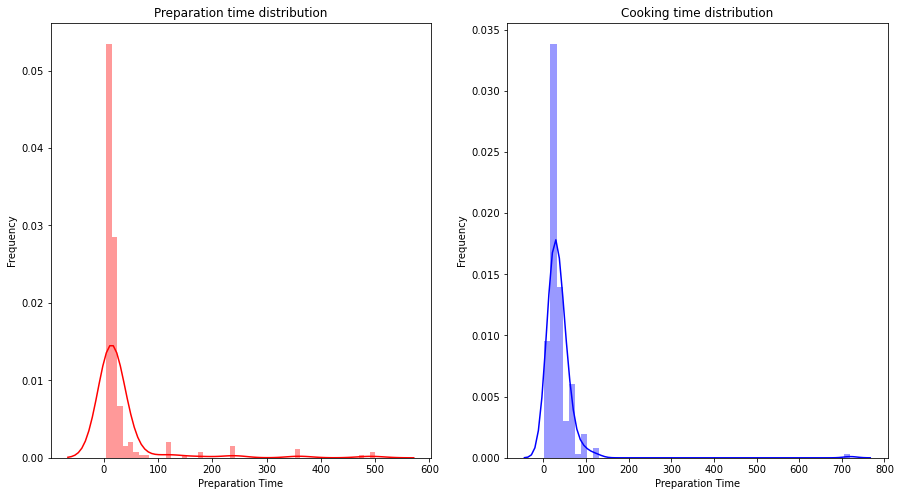

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(data['prep_time'],color='red')
plt.title('Preparation time distribution')
plt.xlabel('Preparation Time')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
sns.distplot(data['cook_time'],color='blue')
plt.title('Cooking time distribution')
plt.xlabel('Cooking Time')
plt.ylabel('Frequency')

* Most of the dishes have preparation time less than 100 minutes.(~ 1.5 hrs).There are a few dishes for which the preparation time takes more than 500 minutes (~8 hrs).
* The peak in cooking time is between 0-100 minutes and there is a slight peak near 700 minutes(~11 hrs).

This historgram will not provide a difference between vegetarian and non-vegetarian dishes.Also,we should consider the total time taken for the recipe.

In [15]:
data['total_time']=data['prep_time']+data['cook_time']

Text(0, 0.5, 'Total Time')

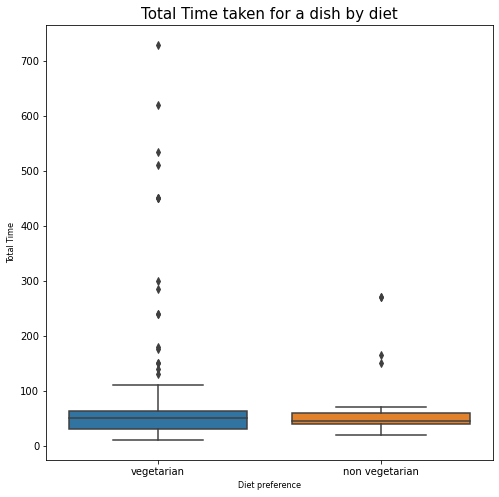

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x='diet',y='total_time',data=data,palette=sns.color_palette('colorblind'))
plt.title('Total Time taken for a dish by diet',fontsize=15)
plt.xlabel('Diet preference',fontsize=8)
plt.ylabel('Total Time',fontsize=8)

It is seen that the total time taken to cook for vegetarian dishes is higher than non-vegetarian dishes.But this cant be generalized since ~88 % of the data is represented by vegeratian dishes and we cant conclude basis the preparation time of only ~11 % of the non-vegetarian dishes.

In [18]:
## Dishes with total time > 400 minutes:
data.loc[data['total_time']>=400,]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East,510
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West,730
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North,620
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,All States,South,450
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,All States,South,450
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,All States,South,450
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,sweet,main course,Kerala,South,535


Hmm,Our assumption that the prep time and cook time are in minutes turned out to be wrong.Because,I dont think preparation time for Dosa,Idli will take more than 5 hrs.More clarity is required on these two columns inorder to investigate further.

### Ingredients

In [36]:
##total ingredients required:
data['total_ingredients']=data['ingredients'].apply(lambda x:len(set(x.split())))

In [37]:
data['total_ingredients'].describe()

count    255.000000
mean       7.058824
std        2.381125
min        2.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       12.000000
Name: total_ingredients, dtype: float64

Maximum ingredients required for a dish in this datase is 12 and minumum ingredients is 2.Lets check the dishes.

In [39]:
data.loc[data['total_ingredients']==12,]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,total_ingredients
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,12
45,Mysore pak,"Besan flour, semolina, mung bean, jaggery, coc...",vegetarian,5,20,sweet,dessert,Karnataka,South,25,12


In [40]:
data.loc[data['total_ingredients']==2,]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,total_ingredients
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East,510,2
39,Chikki,"Peanuts, jaggery",vegetarian,10,20,sweet,dessert,Maharashtra,West,30,2
57,Dhondas,"Cucumber, rava",vegetarian,10,50,sweet,dessert,Maharashtra,West,60,2
59,Mahim halwa,"Semolina, sugar",vegetarian,10,25,sweet,dessert,Maharashtra,West,35,2
190,Keri no ras,"Mango, sugar",vegetarian,10,10,sour,main course,Gujarat,West,20,2
234,Hando Guri,"Jaggery, raisins",vegetarian,10,10,sweet,dessert,Assam,North East,20,2


* 2 dishes - Ghevar , an Rajasthani dessert and Mysore Pak ,another dessert from Karnataka require the maximum ingredients to prepare.

* 6 dishes - 5 from dessert and 1 main course require 2 ingredients.

It is interesting to note that dishes with require maximum as well as the least dishes being to dessert type except for 1 dish.

Lets check the total ingredients by course,flavor_profile and diet.

Text(0, 0.5, 'Total Ingredients')

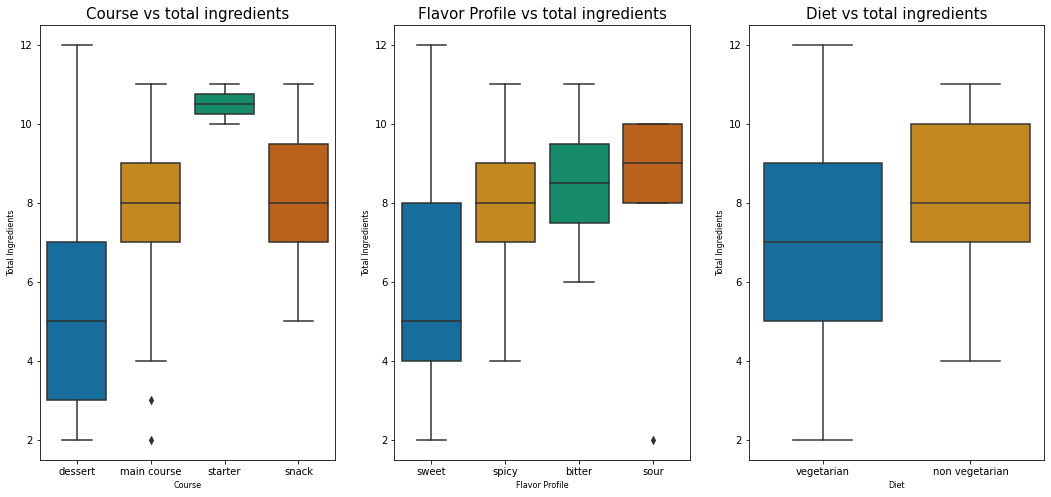

In [51]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(x='course',y='total_ingredients',data=data,palette=sns.color_palette('colorblind'))
plt.title('Course vs total ingredients',fontsize=15)
plt.xlabel('Course',fontsize=8)
plt.ylabel('Total Ingredients',fontsize=8)
plt.subplot(1,3,2)
sns.boxplot(x='flavor_profile',y='total_ingredients',data=data,palette=sns.color_palette('colorblind'))
plt.title('Flavor Profile vs total ingredients',fontsize=15)
plt.xlabel('Flavor Profile',fontsize=8)
plt.ylabel('Total Ingredients',fontsize=8)
plt.subplot(1,3,3)
sns.boxplot(x='diet',y='total_ingredients',data=data,palette=sns.color_palette('colorblind'))
plt.title('Diet vs total ingredients',fontsize=15)
plt.xlabel('Diet',fontsize=8)
plt.ylabel('Total Ingredients',fontsize=8)

* Though main course contribute to 50 % of the total dishes,the maximum total ingredients required is 11.

* From the dishes provided in this dataset,it is seen that median ingredients for starters is more compared to other courses.

* Though the maximum number of ingredients required to prepare a desset is 12 ,the median is lesser compared to other courses.Similarly for a sweet dish,the median is lower compared to other dishes whereas the maximum ingredients is the highest.

### Ingredients

Lets create a user defined function to count the ingredients based on the flavor profile,diet.

In [90]:
def ingre_count(d):
    foo=list(d['ingredients'].apply(lambda x:[i.strip() for i in x.split(',')]))
    return Counter(i for j in foo for i  in j).most_common(5)

What are the top 5 ingredients in Indian cusine ?

In [91]:
## top 10 ingredients in Indian cusine,
ingre_count(data)

[('sugar', 44),
 ('ginger', 29),
 ('garam masala', 27),
 ('ghee', 25),
 ('curry leaves', 25)]

What are the top 5 ingredients for preparing vegetarian and non-vegetarian dishes ?

In [92]:
## top 5 in vegetarian dishes,
ingre_count(data.loc[data['diet']=='vegetarian',])

[('sugar', 43),
 ('ghee', 25),
 ('curry leaves', 24),
 ('garam masala', 23),
 ('ginger', 23)]

In [93]:
## top 5 in non-vegetarian dishes,
ingre_count(data.loc[data['diet']=='non vegetarian',])

[('mustard oil', 7),
 ('ginger', 6),
 ('Chicken', 4),
 ('garam masala powder', 4),
 ('garam masala', 4)]

43 vegetarian dishes available in this dataset are prepared using sugar and ghee where as non-vegeratian dishes represented 11 % in the dataset have mustard oil,ginger as common ingredient.

In [95]:
### top 5 in spicy dishes
ingre_count(data.loc[data['flavor_profile']=='spicy',])

[('ginger', 26),
 ('garam masala', 24),
 ('curry leaves', 19),
 ('urad dal', 16),
 ('tomato', 13)]

In [96]:
### top 5 in sweet dishes
ingre_count(data.loc[data['flavor_profile']=='sweet',])

[('sugar', 37),
 ('ghee', 25),
 ('jaggery', 15),
 ('milk', 14),
 ('Rice flour', 10)]

In [97]:
### top 5 in sour dishes
ingre_count(data.loc[data['flavor_profile']=='sour',])

[('curry leaves', 3),
 ('Urad dal', 2),
 ('Arhar dal', 1),
 ('sambar powder', 1),
 ('tomato', 1)]

In [98]:
### top 5 in bitter dishes
ingre_count(data.loc[data['flavor_profile']=='bitter',])

[('fenugreek leaves', 2),
 ('Potato', 1),
 ('chillies', 1),
 ('salt', 1),
 ('oil', 1)]

The analysis of ingredients by flavor profile is not surprising since they are made of items which gives the flavor.

## Conclusion

In this short analysis,we have tried to explore different aspects of Indian dishes.

* There were 255 dishes which were made available of which 88 % of them were vegetarian and ~50 % of the total dishes were for the main course , ~ 54 % of the total dishes were spicy flavor.

* Total ingredients required for cooking ranged between 2 to 12 with Ghevar and Mysore Pak both of sweet flavor and a dessert requiring maximum ingredients whereas there were another 5 dishes of dessert type that require only 2 ingredients to prepare the dish.

* While the most common ingredient among the 255 dishes were sugar,ginger,garam masala and ghee -sugar and ghee was more used for the vegetarian dishes while mustard oil was used for non-vegetarian dishes.Since the percentage representation of non-vegetarian dishes is only 11 % we could not strongly conclude anything about them.


## What can be done further ?

* We have noted in our analysis that the preparation and cooking time was more for certain dishes which would not normally take that many hours.After getting more clarity on those columns,an analysis could be done on the same.

* The ingredients column can be cleaned since a quick look at the column indicates that there are few items which could be grouped - like Urad dal ,urad dal are indicated as two separate items whereas we know it is the same.